[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/populationcodes/random-matrix-gallery/HEAD?urlpath=%2Fdoc%2Ftree%2Fensembles%2FElliptic.ipynb)

In [1]:
import plot
import utils

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./presentation.mplstyle')

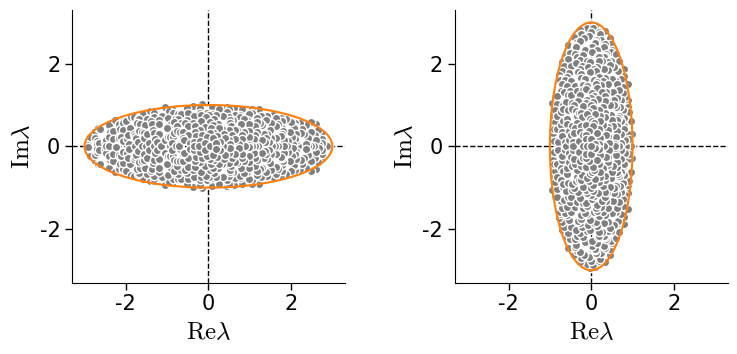

In [2]:
utils.init_randomness()

N = 500
J = 2

TAUs = np.array([0.5, -0.5])

fig, s = plt.subplots(1, len(TAUs), figsize=(4*len(TAUs), 4))
for k in range(len(TAUs)):
    tau = TAUs[k]
    
    # [Wji,Wij]~Gaussian(0,[J**2, tau; tau, J**2]/N)
    W = utils.sample_correlated(N, [0, 0], [[J**2/N, tau*J**2/N], [tau*J**2/N, J**2/N]])
    z = np.linalg.eigvals(W) 

    cx = s[k]
    plot.show_complex_spectrum(cx, z, radius=[J*(1+tau), J*(1-tau)])

name = utils.get_script_name()
if name is not None:
    fig.savefig("../images/%s.png"%name)
plt.show()

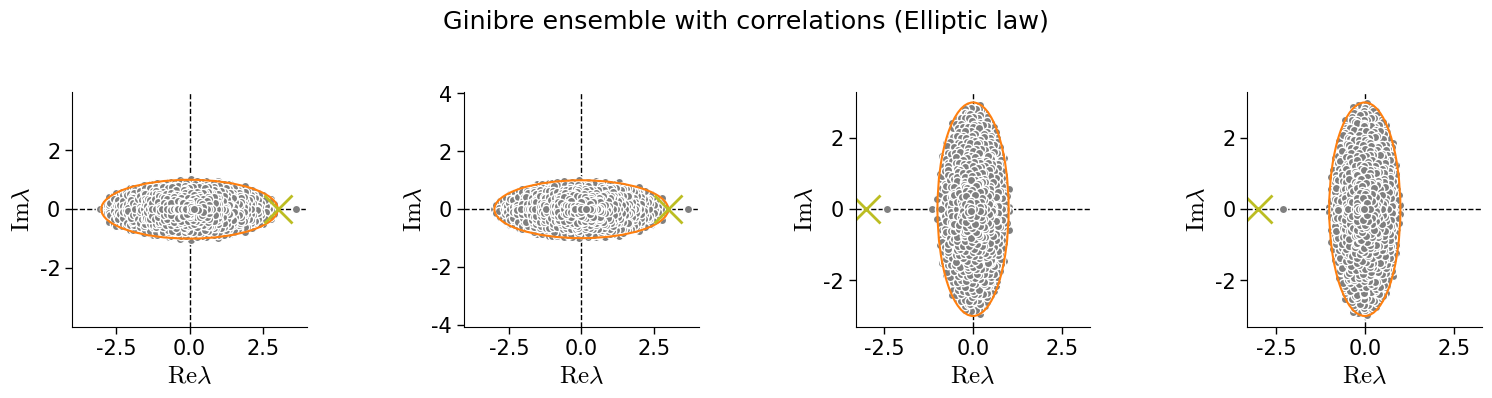

In [3]:
N = 500
J = 2

# [Wji,Wij]~Gaussian(0,[J**2, tau; tau, J**2]/N)
TAUs = np.array([0.5, 0.5, -0.5, -0.5])
MUs = np.array([3/N, 3/N, -3/N, -3/N])
assert len(TAUs) == len(MUs)
fig, s = plt.subplots(1, 4, figsize=(4*4, 4))

for k in range(len(TAUs)):
    tau = TAUs[k]
    mu = MUs[k]
    W = utils.sample_correlated(N, [mu, mu], [[J**2/N, tau*J**2/N], [tau*J**2/N, J**2/N]])
    z = np.linalg.eigvals(W) 

    cx = s[k]
    plot.show_complex_spectrum(cx, z, radius=[J*(1+tau), J*(1-tau)], outlier=[mu*N,0])

fig.suptitle("Ginibre ensemble with correlations (Elliptic law)", fontsize="small")
plt.show()
